# Second Neural Network

In [1]:
import pandas as pd

from openbb_terminal.sdk import openbb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

%matplotlib inline
import matplotlib.pyplot as plt

### Collecting and organizing the TSLA data

In [2]:
# Current TSLA price technical analysis summary
tsla = openbb.stocks.ta.summary(symbol="TSLA")
print("Technical Analysis Summary:", tsla)

Technical Analysis Summary: TSLA price has changed -0.86% in the last 3 days and -1.46% yesterday. RSI is currently neutral but close to the oversold area and the indicator is pointing downwards. MACD is in the Bearish area and the histogram is moving upwards. TSLA price is trading below the 200-day SMA line and the SMA is trending down. The asset price is between the Middle and the Lower Bollinger Bands. 


In [3]:
# Load the 10-yr TSLA stock data into a dataframe from openbb terminal
tsla_10yr_daily = openbb.stocks.load(
        symbol = 'TSLA',
        start_date = '2013-03-01',
        end_date= '2023-03-01',
        monthly = False
)

# Display first five rows
tsla_10yr_daily.head()

Loading Daily data for TSLA with starting period 2013-03-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-03-01,2.333333,2.338667,2.283333,2.310000,2.310000,23199000,0.0,0.0
2013-03-04,2.318000,2.388667,2.313333,2.372000,2.372000,26365500,0.0,0.0
2013-03-05,2.400000,2.461333,2.386000,2.443333,2.443333,31305000,0.0,0.0
2013-03-06,2.467333,2.525333,2.464667,2.512667,2.512667,17250000,0.0,0.0
2013-03-07,2.515333,2.576667,2.458667,2.548667,2.548667,17374500,0.0,0.0


In [4]:
# Drop the columns that are not going to be used for the model
tsla_10yr_daily.drop(columns=["Adj Close", "Dividends", "Stock Splits", "Volume"], inplace=True)

# Display first five row
tsla_10yr_daily.head()

,Open,High,Low,Close
date,,,,
2013-03-01,2.333333,2.338667,2.283333,2.310000
2013-03-04,2.318000,2.388667,2.313333,2.372000
2013-03-05,2.400000,2.461333,2.386000,2.443333
2013-03-06,2.467333,2.525333,2.464667,2.512667
2013-03-07,2.515333,2.576667,2.458667,2.548667


In [ ]:
# Plot the closing price for TSLA for the last 10yrs
plt.plot(
    tsla_10yr_daily.index, 
    tsla_10yr_daily["Close"]
)
plt.title("TSLA Closing Price from March 2013-2023")
plt.xlabel("Year")
plt.ylabel("Price")

In [5]:
# TSLA monthly bollinger bands and dropping unwanted columns
tsla_bbands_30d = openbb.ta.bbands(
    data = tsla_10yr_daily, 
    window = 30, 
    n_std = 2, 
    mamode = "ema").drop(columns=["BBP_30_2.0", "BBB_30_2.0"]
)
tsla_bbands_30d.head()

,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0
date,,,
2013-04-12,2.204434,2.589200,2.973967
2013-04-15,2.223721,2.608392,2.993062
2013-04-16,2.232093,2.636194,3.040295
2013-04-17,2.239285,2.661601,3.083917
2013-04-18,2.239149,2.691906,3.144664


In [ ]:
# Plot the Bollinger Bands data
plt.plot(tsla_bbands_30d.index, tsla_bbands_30d["BBL_30_2.0"], label = "Lower")
plt.plot(tsla_bbands_30d.index, tsla_bbands_30d["BBM_30_2.0"], label = "Middle")
plt.plot(tsla_bbands_30d.index, tsla_bbands_30d["BBU_30_2.0"], label = "Upper")
plt.title("TSLA Monthly Bollinger Bands Data")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title='Bands')

In [ ]:
# Boilinger bands data chart with the stock price
tsla_bbands_30d_chart = openbb.ta.bbands_chart(data=tsla_10yr_daily, window = 30, n_std = 2, mamode = "ema")
tsla_bbands_30d_chart

In [6]:
# TSLA 30 day average true range
atr_tsla_30d = openbb.ta.atr(data = tsla_10yr_daily, window = 30, mamode = "ema")
atr_tsla_30d.head()

,ATRe_30
date,
2013-04-12,0.114069
2013-04-15,0.112258
2013-04-16,0.117231
2013-04-17,0.115732
2013-04-18,0.117771


In [ ]:
# TSLA atr chart with stock price chart
atr_tsla_30d_chart = openbb.ta.atr_chart(data = tsla_10yr_daily, window = 30, mamode = "ema")

In [7]:
# TSLA 30 day relative strength index
rsi_tsla_30d = openbb.ta.rsi(data = tsla_10yr_daily["Close"], window = 30)
rsi_tsla_30d

,RSI_30
date,
2013-04-15,64.518071
2013-04-16,68.419020
2013-04-17,67.946589
2013-04-18,70.253570
2013-04-19,71.456023
...,...
2023-02-22,56.548469
2023-02-23,56.828381
2023-02-24,55.249155


In [ ]:
# TLSA rsi chart and stock price chart
rsi_tsla_30d_chart = openbb.ta.rsi_chart(data = tsla_10yr_daily["Close"], window = 30)

In [8]:
# TSLA 30 day exponential moving average data
ema_tsla_30d = openbb.ta.ema(data = tsla_10yr_daily["Close"], length = 30)
ema_tsla_30d

,EMA_30
date,
2013-04-12,2.589200
2013-04-15,2.608392
2013-04-16,2.636194
2013-04-17,2.661601
2013-04-18,2.691906
...,...
2023-02-22,180.286725
2023-02-23,181.692098
2023-02-24,182.671963


In [ ]:
# TSLA ema chart
plt.plot(ema_tsla_30d)
plt.title("TSLA Monthly EMA Data")
plt.xlabel("Year")
plt.ylabel("Price")

In [9]:
# TSLA 30 day standard deviation data
std_tsla_30d = openbb.ta.standard_deviation(data = tsla_10yr_daily, window = 30)
std_tsla_30d

date
2013-04-15    0.592543
2013-04-16    0.603883
2013-04-17    0.601261
2013-04-18    0.602905
2013-04-19    0.603401
                ...   
2023-02-22    0.694462
2023-02-23    0.691311
2023-02-24    0.700320
2023-02-27    0.707476
2023-02-28    0.707429
Name: Close, Length: 2487, dtype: float64

In [ ]:
plt.plot(std_tsla_30d)
plt.title("TSLA Monthly STD Data")
plt.xlabel("Year")
plt.ylabel("Variation")

In [10]:
# Concatenating all of the TSLA dataframe metrics together, changing std name, and dropping null values
everything_tsla = pd.concat([tsla_10yr_daily, tsla_bbands_30d, atr_tsla_30d, rsi_tsla_30d, ema_tsla_30d, std_tsla_30d], axis=1)
everything_tsla.columns = [*everything_tsla.columns[:-1], "STD_30"]
everything_tsla = everything_tsla.dropna()
everything_tsla.head()

,Open,High,Low,Close,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,ATRe_30,RSI_30,EMA_30,STD_30
date,,,,,,,,,,,
2013-04-15,2.900000,2.920000,2.834000,2.886667,2.223721,2.608392,2.993062,0.112258,64.518071,2.608392,0.592543
2013-04-16,2.946000,3.076000,2.927333,3.039333,2.232093,2.636194,3.040295,0.117231,68.419020,2.636194,0.603883
2013-04-17,3.033333,3.063333,2.969333,3.030000,2.239285,2.661601,3.083917,0.115732,67.946589,2.661601,0.601261
2013-04-18,3.065333,3.173333,3.026000,3.131333,2.239149,2.691906,3.144664,0.117771,70.253570,2.691906,0.602905
2013-04-19,3.164000,3.325333,3.138000,3.188667,2.237200,2.723955,3.210711,0.122689,71.456023,2.723955,0.603401


### Splitting the testing and training data

In [11]:
# Split the training and testing Data
X = everything_tsla.drop(columns=["Close"]).dropna()
y = everything_tsla["Close"]

In [12]:
# Using train_test_split to further split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [13]:
# Preprocessing the data with a scaler
X_scaler = MinMaxScaler(feature_range = (0, 1))

In [14]:
# Fitting the scaler to the training dataset
X_scaler.fit(X_train)

MinMaxScaler()

In [15]:
# Transform the dataset with scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.64158085, 0.        ,
        0.46485485],
       [0.00201055, 0.00676672, 0.00415626, ..., 0.71088255, 0.00130271,
        0.47770488],
       [0.00582766, 0.00621727, 0.00602658, ..., 0.70248964, 0.00249317,
        0.47473411],
       ...,
       [0.89819055, 0.91434595, 0.90633531, ..., 0.79768948, 0.85024209,
        0.43326925],
       [0.92222968, 0.91784502, 0.91159003, ..., 0.74061353, 0.85848554,
        0.44260487],
       [0.90623274, 0.91680398, 0.9247417 , ..., 0.74908879, 0.86672315,
        0.44169007]])

### Creating Second model

In [16]:
# The number of inputs/features into the model
number_inputs = 10

# The number of layer 1 hidden nodes for the model
hidden_nodes_layer1 = 64

# The number of layer 2 hidden nodes for the model
hidden_nodes_layer2 = 32

# Creating the Sequential model
neuron = Sequential()

# Adding a Dense layer and the elu activation function
neuron.add(Dense(units=hidden_nodes_layer1, input_dim=number_inputs, activation="elu"))

# Adding a Dense layer and the tanh activation function
neuron.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Add the output layer to the model and the relu activation function
neuron.add(Dense(1, activation="relu"))

In [17]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compiling the Sequential Model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Fitting the model with the training data
model = neuron.fit(X_train_scaled, y_train, epochs=200, batch_size=100, shuffle=True)

Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: -1.5714 - accuracy: 0.0000e+00
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: -32.6185 - accuracy: 0.0000e+00
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: -71.8914 - accuracy: 0.0000e+00
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: -112.8887 - accuracy: 0.0000e+00
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: -141.6168 - accuracy: 0.0000e+00
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: -160.2890 - accuracy: 0.0000e+00
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: -174.8138 - accuracy: 0.0000e+00
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: -187.5371 - accuracy: 0.0000e+00
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: -199.3110 - accuracy: 0.0000e+00
Epoch 10/200
17/17 [==============================

### Looking into model 2 performance

In [20]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
df.head()

,loss,accuracy
1,-1.571416,0.0
2,-32.618523,0.0
3,-71.891418,0.0
4,-112.888748,0.0
5,-141.616791,0.0


<Axes: >

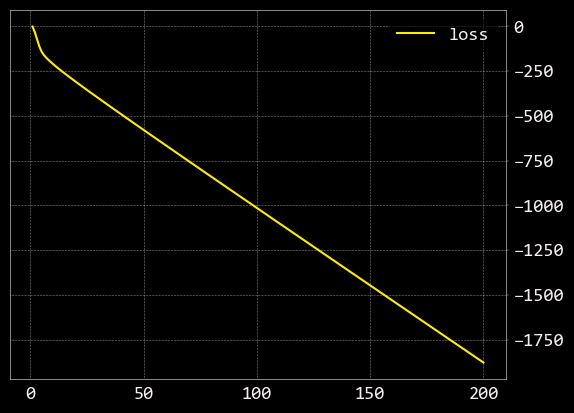

In [21]:
# Plot the loss
df.plot(y="loss")

<Axes: >

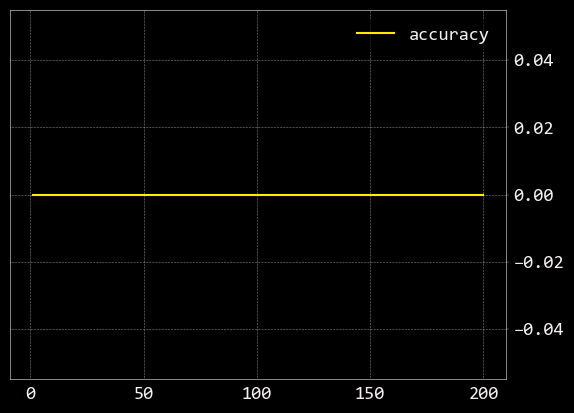

In [22]:
# Plot the accuracy
df.plot(y="accuracy")

In [23]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: -2.4247e+04 - accuracy: 0.0000e+00 - 159ms/epoch - 6ms/step
Loss: -24246.662109375, Accuracy: 0.0
